In [1]:
import os
from os.path import exists, join

import cv2
import glob
import numpy as np

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [2]:
def try_find_path( p ):
    if not exists( p ):
        raise Exception( "%s is not found." % p )

In [3]:
def read_grayscale( p ):
    return cv2.imread( p, cv2.IMREAD_GRAYSCALE )

In [4]:
def show_img( img, title, img2, title2 ):
    fig, (a1, a2) = plt.subplots( 1, 2, figsize=(15,15) )
    a1.imshow(img)
    a1.set_title(title)
    a2.imshow(img2, cmap='gray')
    a2.set_title(title2)
    fig.show()
    
def show_images(images):
    width, height = 25, 25
    fig           = fig=plt.figure(figsize=(width, height))
    columns       = 2
    rows          = 3
    for i in range(1, len(images)):
        img = images[i]
        img = cv2.imread( img, cv2.IMREAD_COLOR )
        img = cv2.cvtColor( img , cv2.COLOR_BGR2RGB )
        f = fig.add_subplot(rows, columns, i)
        f.title.set_text(str(i))
        plt.imshow(img)
    plt.show()


In [11]:
def process(root, dataset_name):
    Images_Medetec_dir = join( root, dataset_name)
    try_find_path(Images_Medetec_dir)
    
    dir_name = input( "dir: " )
    selected_dir = join( Images_Medetec_dir, dir_name )
    try_find_path( selected_dir )
    
    images = []
    for image in glob.glob(selected_dir + "/*.jpg"):
        images.append(image)
    for image in glob.glob(selected_dir + "/*.png"):
        images.append(image)

    images = sorted(images)
    show_images(images)
    
    original_img_name = "%s.jpg" % dir_name
    original_img_path = join( selected_dir , original_img_name )
    try_find_path( original_img_path )

    
    background_img_number = input( "background number: " )
    background_img_path   = images[int(background_img_number)]
    background_img_name   = images[int(background_img_number)].split("/")[-1]

    foreground_img_number = input( "foreground number: " )
    foreground_img_path   = images[int(foreground_img_number)]
    foreground_img_name   = images[int(foreground_img_number)].split("/")[-1]

    original_img = cv2.imread( original_img_path, cv2.IMREAD_COLOR )
    original_img = cv2.cvtColor( original_img , cv2.COLOR_BGR2RGB )
    background_img = read_grayscale( background_img_path )
    foreground_img = read_grayscale( foreground_img_path )
    new_img = background_img - foreground_img

    show_img( original_img, original_img_name, new_img, background_img_name )
    plt.show()
    
    override = input("Overwrite %s? (Y/N):" % background_img_name) in ["Y", "y"]

    if override:
        cv2.imwrite( background_img_path, new_img )
    else:
        new_name = input("new name: ") + ".png"
        new_path = join( selected_dir, new_name )
        cv2.imwrite( new_path, new_img )

dir:  100087


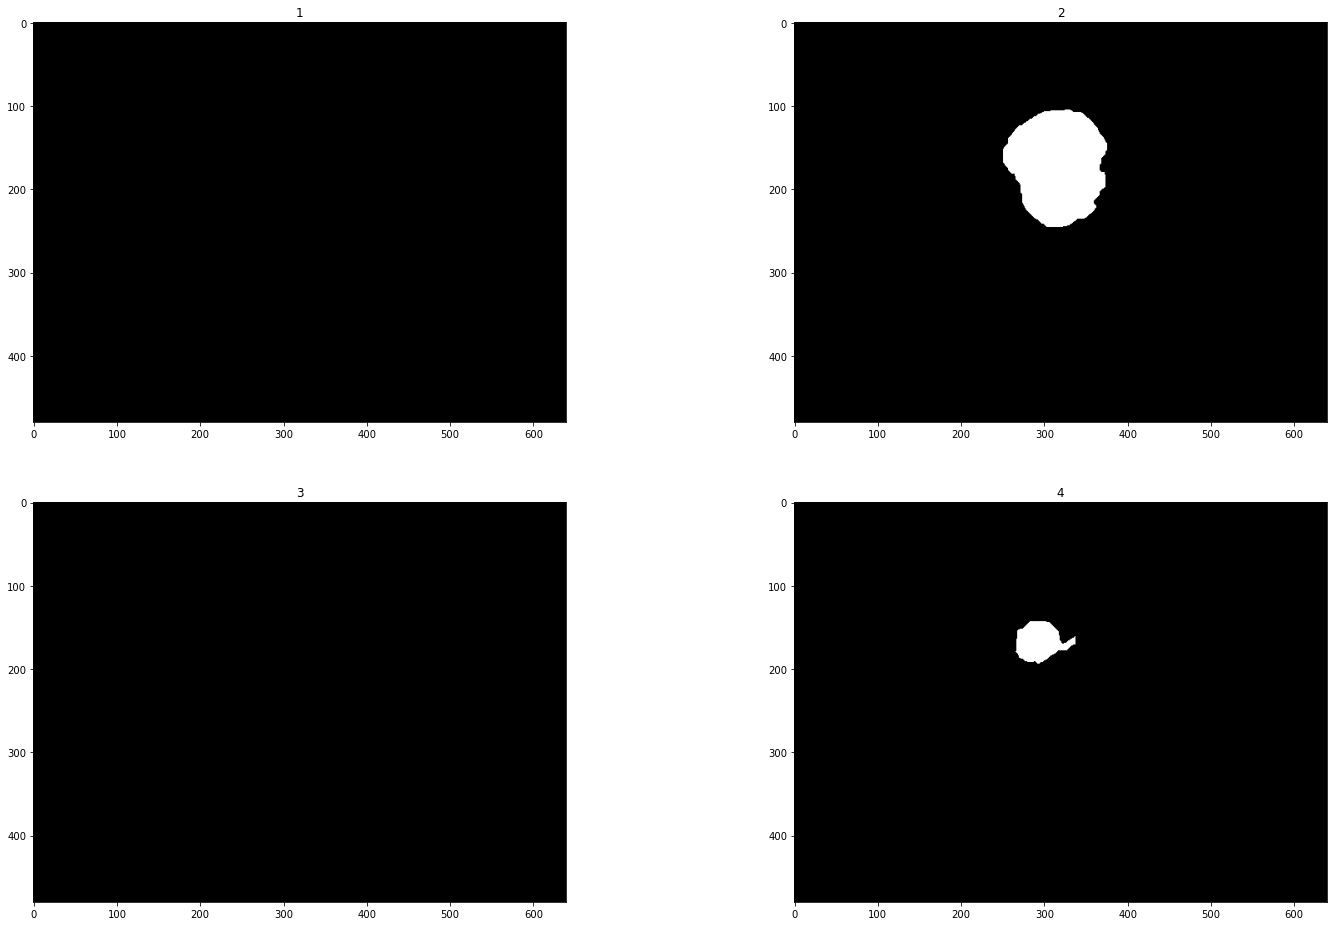

background number:  2
foreground number:  4


<ipython-input-4-360a883f2caa>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


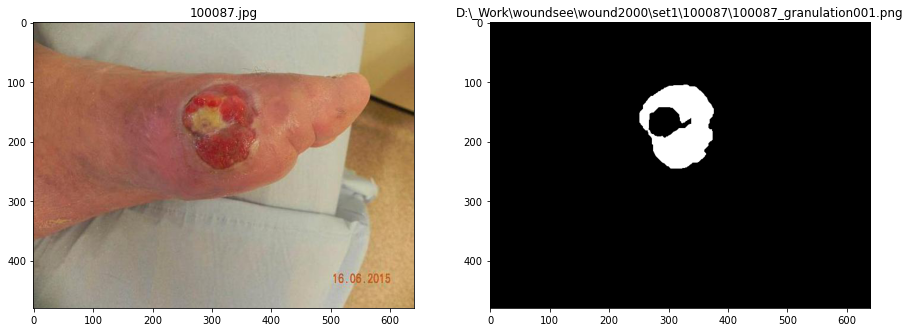

Overwrite D:\_Work\woundsee\wound2000\set1\100087\100087_granulation001.png? (Y/N): y


In [22]:
process("D:\\_Work\\woundsee", "wound2000\\set1")

In [159]:
root         = os.getcwd() + "/data"
dataset_name = "wound_rajavithi"
image_dir    = join( root, dataset_name, "wound_classification", "image_multimarker" )
print(image_dir)

/Users/manny/Desktop/woundsee-ai/jupyter/data/wound_rajavithi/wound_classification/image_multimarker


/Users/manny/Desktop/woundsee-ai/jupyter/data/wound_rajavithi/wound_classification/image_multimarker/IMG_25570207_100924
1
2
3


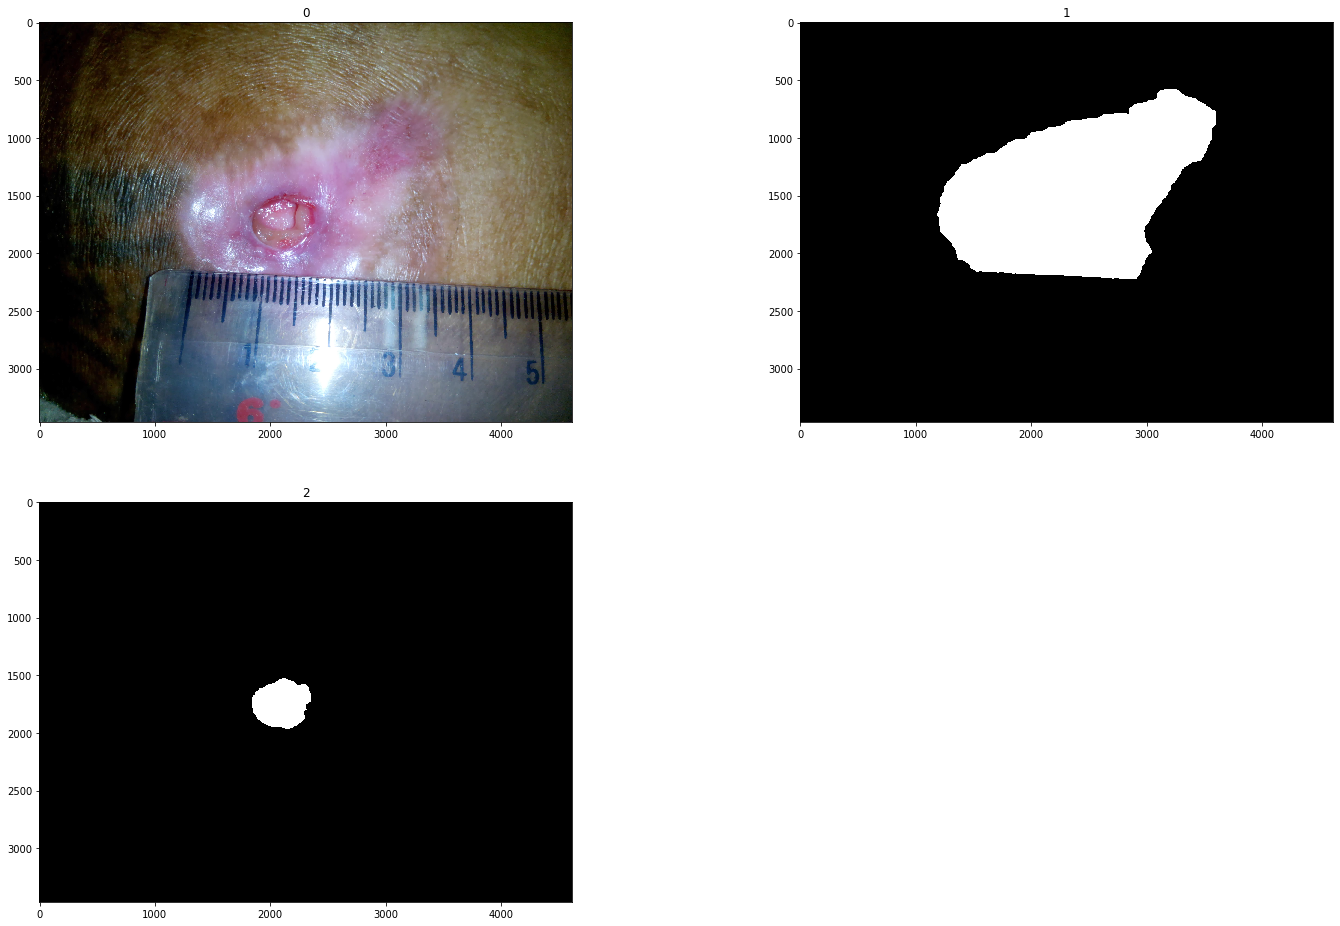

In [108]:

count = 0

for path in os.walk(image_dir):
    path_name = None
    
    if path[0] != image_dir:
        count    += 1
        path_name = path[0]
        images    = []
    
        print(path_name)
        for image in glob.glob(path_name + "/*.jpg"):
            images.append(image)
        for image in glob.glob(path_name + "/*.png"):
            images.append(image)
            
        images = sorted(images)
        show_images(images)
        
        
        
    if count == 1:
        break

In [89]:
IMG_2375
IMG_2477
IMG_2567
IMG_2677
IMG_2678
IMG_2775
IMG_2991
IMG_2992
IMG_3045
IMG_3086
IMG_3121
IMG_3125
IMG_3126
IMG_3137
IMG_3138
IMG_3139
IMG_3140
IMG_3153
IMG_3235
IMG_3236
IMG_3318
IMG_3321
IMG_3322
IMG_3323
IMG_3325
IMG_3353
IMG_3379
IMG_3381
IMG_3383
IMG_3385
IMG_3386
IMG_3387
IMG_3441
IMG_3442
IMG_3443
IMG_3460
IMG_3461
IMG_3609
IMG_4406
IMG_4407
IMG_4814
IMG_4888
IMG_4893
IMG_4894
IMG_4895
IMG_4904
IMG_4905
IMG_4907
IMG_4908
IMG_5426
IMG_5486
IMG_5487
IMG_6032
IMG_6033
IMG_6080
IMG_8054
IMG_8568
IMG_8580
IMG_8582
IMG_8961
IMG_9473
IMG_9474
IMG_9475
IMG_9476
IMG_9479
IMG_9481
IMG_9483
IMG_9484
IMG_9485
IMG_25570204_081244
IMG_25570207_094611
IMG_25570207_100736
IMG_25570207_100924
IMG_25570207_101223
IMG_25570207_101229
IMG_25570207_101233
IMG_25570207_101736
IMG_25570207_104428
IMG_25570207_104758
IMG_25570207_104804
IMG_25570207_112010
IMG_25570207_112013
IMG_25570207_113044
IMG_25570221_095738
IMG_25570221_095741

['/Users/manny/Desktop/woundsee-ai/jupyter/data/wound_rajavithi/wound_classification/image_multimarker/IMG_25570207_100924/IMG_25570207_100924_epithelial001.png', '/Users/manny/Desktop/woundsee-ai/jupyter/data/wound_rajavithi/wound_classification/image_multimarker/IMG_25570207_100924/IMG_25570207_100924_slough001.png']
